# Lab 3A - Lagrange Multipliers

The _method of Lagrange multipliers_ is a powerful technique for solving **constrained optimization** problems. In a constrained optimization problem, we are given a function $f(\mathbf{x})$ that we want to optimize (i.e. maximize or minimize), subject to some constraint $g(\mathbf{x}) = 0$. In other words, imagine that we are only allowed to plug a point $\mathbf{x}$ into $f$ if $\mathbf{x}$ satisfies the constraint equation $g(\mathbf{x}) = 0$. The set of points $\mathbf{x}$ satisfying the constraint $g(\mathbf{x}) = 0$ will typically form some geometric object, like a curve or surface. We want to identify the points on this geometric object at which $f$ is minimized or maximized, compared to other nearby points on the geometric object.

Our working example will be the problem of finding the extrema of 
$$h(x,y) = x^2 + y^2$$
subject to the constraint 
$$g(x,y) = x^3 + y^2 -2x - \frac{3}{2} = 0$$

Let's get a feel for this problem by first plotting the graph of $g(x,y) = 0$ and a heatmap for the function $h(x,y)$.


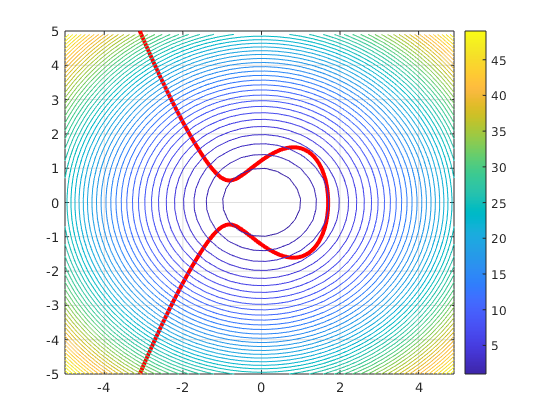

In [1]:
xvec = [-5:.3:5]; yvec = xvec;
[X,Y]=meshgrid(xvec,yvec);

%creating a function handle for g
g = @(x,y) x.^3 + y.^2 - 2*x - 1.5;

%plotting the curve defined implicitly by g over the default interval x=[-5,5]
fimplicit(g,'red','LineWidth',3)

H = X.^2 + Y.^2;
hold on;

%plotting level curves of h
contour(X,Y,H,50)
colorbar
grid on

From the contour plot above, we can see that $h$ is unbounded on the curve $g = 0$: as you travel along one branch of the curve, the values of $h$ at the points on this branch go off to infinity. Since $h(x,y) = x^2 + y^2$ represents the squared distance from the point $(x,y)$ to the origin $(0,0)$, we can also interpret this fact as saying that there are points on the curve $g = 0$ which are arbitrarily far from the origin. Thus, we should not expect to find a _global_ maximum for $h$, subject to the constraint $g = 0$. However, judging from the picture, we should expect to find local minima of $h$ at roughly the two points on the curve intersecting the innermost circle shown in the plot. We should also expect to find a local minimum of $h$ at the rightmost point on the curve. Finally, we should expect local maxima at the bottom right and top right most points of the curve.

## The Reasoning, in 2D

(See the file `'Lagrange Multipliers Derivation.pdf'` for pictures)

Say we want to find local extrema of a function $h(x,y)$, subject to the constraint $g(x,y) = 0$. Suppose that $p = (x_0, y_0)$ is an extremum of $h$ along the curve $g = 0$. First of all, we know the gradient $\nabla g(p)$ is normal to the curve $g = 0$ at $p$: this is simply because $g = 0$ is a level curve of the function $g$, and gradients are always normal to level curves. However, I claim $\nabla h(p)$ is _also_ normal to the curve $g = 0$ at $p$. The proof is by reducing to a one variable problem:

Let $\gamma: (-\epsilon, \epsilon) \to \mathbb{R}^2$ be a parametrization of the curve $g = 0$, valid near $p$ with $\gamma(0) = p$. Then the function $h(\gamma(t))$ is a _single variable function_, and by assumption it has a local extremum at $t = 0$. Thus, the derivative of our single variable function is zero at this critical point:

$$\frac{d}{dt}\big\vert_{t=0} h(\gamma(t)) = 0$$ 

Now, by the chain rule, we know 

$$0 = \frac{d}{dt}\big\vert_{t=0} h(\gamma(t)) = \nabla h(\gamma(0)) \cdot \gamma'(0) = \nabla h (p) \cdot \gamma'(0)$$ Note that $\gamma'(0)$ is the tangent vector to the curve at $t = 0$, and our calculation tells us that $\nabla h (p)$ is normal to this tangent vector. But this is exactly what it means to say $\nabla h(p)$ is normal to the curve!

So, $\nabla g(p)$ and $\nabla h (p)$ are _both_ normal to the curve. It follows that one is a scalar multiple of the other, so we can write $\nabla h (p) = \lambda \nabla h (p)$ for some number $\lambda$. The number $\lambda$ is called the _Lagrange multiplier_.

We know that $g(p) = g(x_0, y_0) = 0$. We can also write the Lagrange multiplier equation as 
$$(h_x (x_0, y_0), h_y (x_0, y_0)) = (\lambda g_x (x_0, y_0), \lambda g_y (x_0, y_0))$$ In particular, for the three unknowns $x_0, y_0,$ and $\lambda$, we have the system of equations 

$$g(x_0, y_0) = 0$$
$$h_x (x_0, y_0) - \lambda g_x (x_0, y_0) = 0$$
$$h_y (x_0, y_0) - \lambda g_y (x_0, y_0) = 0$$

Three unknowns and three equations! That will, in most cases, be enough to solve for the possible extremal points $p$ and the associated Lagrange multipliers $\lambda$.

## Numerical Computation With Our Example

Let's now use Lagrange multipliers to explicitly find the points at which $h$ is maximized on our curve $g = 0$. We have $\nabla g (x,y) = (3x^2 - 2, 2y)$ and $\nabla h (x,y) = (2x, 2y)$. Thus, the system of equations that we want to solve is 

$$x^3 + y^2-2x-\frac{3}{2} = 0$$
$$2x-\lambda(3x^2-2) = 0 $$
$$2y - 2\lambda y = 0$$

We can solve this in Matlab using the `fsolve` function. This function takes as its inputs a function handle $f$ and an initial guess for a root of $f$; if this guess is close enough to an actual root of $f$, the function will output that root. 

Using the plot above, we can cook up some reasonable initial guesses for the roots of the system. The local minima are at around $(-1, 1)$, $(-1, -1)$, and $(2,0)$. The local maxima are at around $(1,-1.5)$ and $(1,1.5)$. We'll take our initial guess for $\lambda$ to be $1$ arbitrarily. We represent the input of the function handle $f$ as a vector `w = [x y lambda]`.

In [74]:
system = @(w) [w(1)^3 + w(2)^2 - 2*w(1) - 1.5, 2*w(1) - w(3)*(3*w(1)^2 - 2), 2*w(2) - 2*w(3)*w(2)];

min1 = fsolve(system, [-1,1,1])
min2 = fsolve(system, [-1,-1,1])
min3 = fsolve(system, [2,0,1])
max1 = fsolve(system, [1,1.5,1])
max2 = fsolve(system, [1,-1.5,1])


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


min1 =

   -0.5486    0.7536    1.0000


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


min2 =

   -0.5486   -0.7536    1.0000


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


min3 =

    1.6980         0    0.5107


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


max1 =

    1.2153    1.4614    1.0000


Equation solved.

fsolve comple

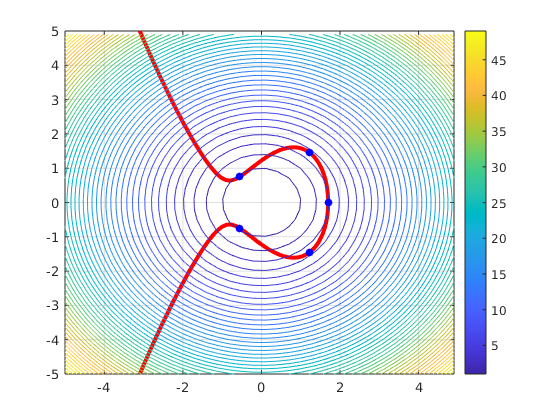

In [75]:
xvec = [-5:.3:5]; yvec = xvec;
[X,Y]=meshgrid(xvec,yvec);

%plotting the curve defined implicitly by g over the default interval x=[-5,5]
fimplicit(g,'red','LineWidth',3)

H = X.^2 + Y.^2;
hold on;

%plotting level curves of h
contour(X,Y,H,50)
colorbar
grid on

%adding the extremal points
all_extrema = [min1' min2' min3' max1' max2'];
scatter(all_extrema(1,:), all_extrema(2,:),'blue','filled')

***
### Exercise 1

Make a function handle for $h$ and evaluate $h$ at each of the five extremal points.
***

## Now With More Dimensions and More Constraints

A similar technique works in higher dimensions and with more constraints: suppose we wish to optimize $f(\mathbf{x})$ subject to the constraints $g_1 (\mathbf{x}) = 0$, $g_2 (\mathbf{x}) = 0$, $\cdots$, $g_k (\mathbf{x}) = 0$. Then the theory of Lagrange multipliers tells us that at any local extremum $p$, there are numbers $\lambda_1, \cdots, \lambda_k$ such that $$\nabla f (p) = \sum_{i=1}^{k} \lambda_i \nabla g_i (p)$$ More accurately, this is true as long as the vectors $\nabla g_i (p)$ satisfy a technical condition called **linear independence**. Intuitively, this means that each constraint should be giving us information that the previous constraints didn't already give us. Although the definition of linear independence is more complicated when there are more than two constraints, in the case where there are just two constraints, linear independence precisely means _the vectors $\nabla g_1 (p)$ and $\nabla g_2 (p)$ are not multiples of each other._  Geometrically, this is asking that the two constraint surfaces are not tangent at $p$. 

Let's work out an example in three dimensions with two constraints.

**Problem:** Find the largest possible volume of a rectangular box satisfying the following two constraints:

* the surface area of the box is 112 cm<sup>2</sup>
* the length and width of the box add up to its height


Let $L$, $W$, and $H$ denote the length, width, and height of the box respectively. The function we want to maximize is $f(L,W,H) = LWH$. Our constraints are $g_1 (L,W,H) = LW+WH+LH - 112 = 0$ and $g_2(L,W,H) = L+W-H = 0$. To start, let's visualize these constraint surfaces. We'll identify the $L$-$W$ plane with the $x$-$y$ plane, and the $H$ axis with the $z$ axis.

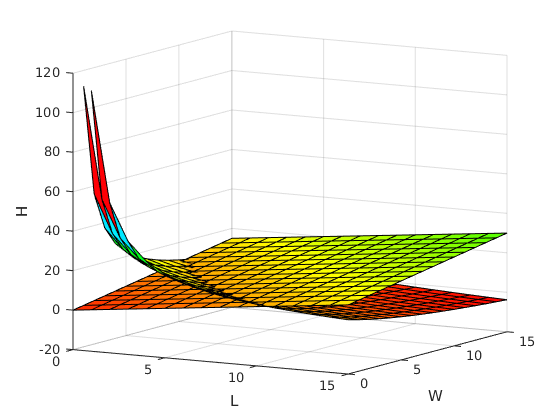

In [86]:
lvec = [0:1:15]; wvec = [0:1:15];
[L,W]=meshgrid(lvec,wvec);

H1 = (112-L.*W)./(L+W);
H2 = L+W;

hold on;
colormap('hsv')

surf(L,W,H1)
surf(L,W,H2)
view(30,10)
grid on
xlabel('L'); ylabel('W'); zlabel('H')


***
### Exercise 2

Additionally, plot the curve of intersection of the two surfaces $g_1 = 0$ and $g_2 = 0$ in the picture above. Then, plot this intersection curve in the $L-W$ plane along with contours for the function $f$. Use this to visually confirm that the function $f$ has a maximum.

**Hint**: Use the quadratic formula to solve for $W$ in terms of $L$. 
***

We now compute the gradients of the three relevant functions to be 

$$\nabla f (L,W,H) = (WH, HL, LW)$$ $$\nabla g_1 (L,W,H) = (W+H, L+H, L+W)$$ $$\nabla g_2 (L, W, H) = (1, 1, -1)$$ 

Thus, if $p = (L_0, W_0, H_0)$ is our critical point, we need to solve the system of equations 

$$L_0 W_0 + L_0 H_0 + W_0 H_0 - 112 = 0 $$ $$L_0 + W_0 - H_0 = 0 $$ $$W_0 H_0 - \lambda_1 (W_0 + H_0) - \lambda_2 = 0$$ $$H_0 L_0 - \lambda_1 (L_0 + H_0) - \lambda_2 = 0$$ $$L_0 W_0 - \lambda_1 (L_0 + W_0) + \lambda_2 = 0$$ 

Note that we have a system of five equations with five unknowns, so we can expect isolated solutions (rather than a whole curve or surface of solutions). Again, we create our function handle to take as input a vector `w = [L,W,H,lambda1, lambda2]`.

In [84]:
system = @(w) [w(1)*w(2)+w(1)*w(3)+w(2)*w(3)-112, ...
               w(1)+w(2)-w(3), ...
               w(2)*w(3)-w(4)*(w(2)+w(3))-w(5), ...
               w(3)*w(1)-w(4)*(w(3)+w(1))-w(5), ...
               w(1)*w(2)-w(4)*(w(1)+w(2))+w(5)];
               
fsolve(system, [1,2,3,1,1])


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


ans =

    4.7329    4.7329    9.4657    2.8397    4.4800

